<a href="https://colab.research.google.com/github/sauravnaldas/progress-of-programing-languages-over-years/blob/main/Progress_of_programing_language_over_years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How can we tell what programming languages and technologies are used by the most people? How about what languages are growing and which are shrinking, so that we can tell which are most worth investing time in? 

One excellent source of data is Stack Overflow, a programming question and answer site with more than 16 million questions on programming topics. By measuring the number of questions about each technology, we can get an approximate sense of how many people are using it. We're going to use open data from the Stack Exchange Data Explorer to examine the relative popularity of languages like R, Python, Java and Javascript have changed over time.

In [30]:
library(dplyr)
library(ggplot2)

In [31]:
path="/by_tag_year.csv"

In [2]:
pl=read.csv(path)

In [3]:
summary(pl)

      year          tag                number         year_total     
 Min.   :2008   Length:40518       Min.   :     1   Min.   :  58390  
 1st Qu.:2011   Class :character   1st Qu.:    99   1st Qu.:1085170  
 Median :2013   Mode  :character   Median :   227   Median :1645404  
 Mean   :2013                      Mean   :  1050   Mean   :1539065  
 3rd Qu.:2016                      3rd Qu.:   540   3rd Qu.:2219527  
 Max.   :2018                      Max.   :266762   Max.   :2305207  

In [4]:
str(pl)

'data.frame':	40518 obs. of  4 variables:
 $ year      : int  2008 2008 2008 2008 2008 2008 2008 2008 2008 2008 ...
 $ tag       : chr  ".htaccess" ".net" ".net-2.0" ".net-3.5" ...
 $ number    : int  54 5910 289 319 6 3 1 42 19 4 ...
 $ year_total: int  58390 58390 58390 58390 58390 58390 58390 58390 58390 58390 ...


This data has one observation for each pair of a tag and a year, showing the number of questions asked in that tag in that year and the total number of questions asked in that year. For instance, there were 54 questions asked about the .htaccess tag in 2008, out of a total of 58390 questions in that year.

Rather than just the counts, we're probably interested in a percentage: the fraction of questions that year that have that tag. So let's add that to the table.

In [8]:
by_tag_year_fraction=pl %>%
mutate(franction_percent=number/year_total) 
format(by_tag_year_fraction,scientific=FALSE)

,year,tag,number,year_total,franction_percent
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,2008,.htaccess,54,58390,0.0009248158931
2,2008,.net,5910,58390,0.1012159616373
3,2008,.net-2.0,289,58390,0.0049494776503
4,2008,.net-3.5,319,58390,0.0054632642576
5,2008,.net-4.0,6,58390,0.0001027573215
6,2008,.net-assembly,3,58390,0.0000513786607
7,2008,.net-core,1,58390,0.0000171262202
8,2008,2d,42,58390,0.0007193012502
9,2008,32-bit,19,58390,0.0003253981846


How is the progess of R Programing ?

Let's look at whether the fraction of Stack Overflow questions that are about R has been increasing or decreasing over time.

   year tag number year_total franction_percent
1  2008   r      8      58390      0.0001370098
2  2009   r    524     343868      0.0015238405
3  2010   r   2270     694391      0.0032690516
4  2011   r   5845    1200551      0.0048685978
5  2012   r  12221    1645404      0.0074273552
6  2013   r  22329    2060473      0.0108368321
7  2014   r  31011    2164701      0.0143257660
8  2015   r  40844    2219527      0.0184021190
9  2016   r  44611    2226072      0.0200402323
10 2017   r  54415    2305207      0.0236052554
11 2018   r  28938    1085170      0.0266667895


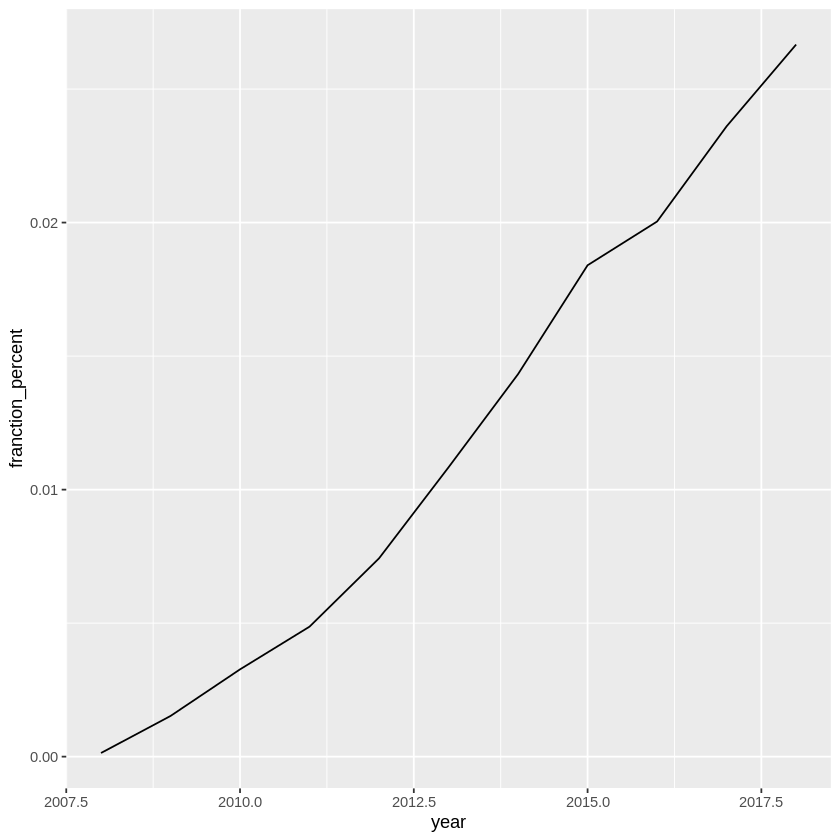

In [9]:
progress_of_r_programming = by_tag_year_fraction %>%
filter(tag=="r")
print(progress_of_r_programming)
ggplot(progress_of_r_programming)+
geom_line(aes(x=year,y=franction_percent))

Rather than looking at the results in a table, we often want to create a visualization. Change over time is usually visualized with a line plot.

Based on that graph, it looks like R has been growing pretty fast in the last decade. Good thing we're practicing it now!


Instead of just looking at R, let's look at all three tags and their change over time. Are each of those tags increasing as a fraction of overall questions? Are any of them decreasing?

In [10]:
selected_tag=c("r","dplyr","ggplot2")
selected_tags_over_time = by_tag_year_fraction %>%
  filter(tag %in% selected_tag)
format(selected_tags_over_time,scientific=FALSE)

,year,tag,number,year_total,franction_percent
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,2008,r,8,58390,0.0001370097619
2,2009,ggplot2,33,343868,0.0000959670571
3,2009,r,524,343868,0.0015238405435
4,2010,ggplot2,245,694391,0.0003528271536
5,2010,r,2270,694391,0.0032690515862
6,2011,ggplot2,547,1200551,0.0004556241259
7,2011,r,5845,1200551,0.0048685978355
8,2012,dplyr,3,1645404,0.0000018232604
9,2012,ggplot2,1299,1645404,0.0007894717650


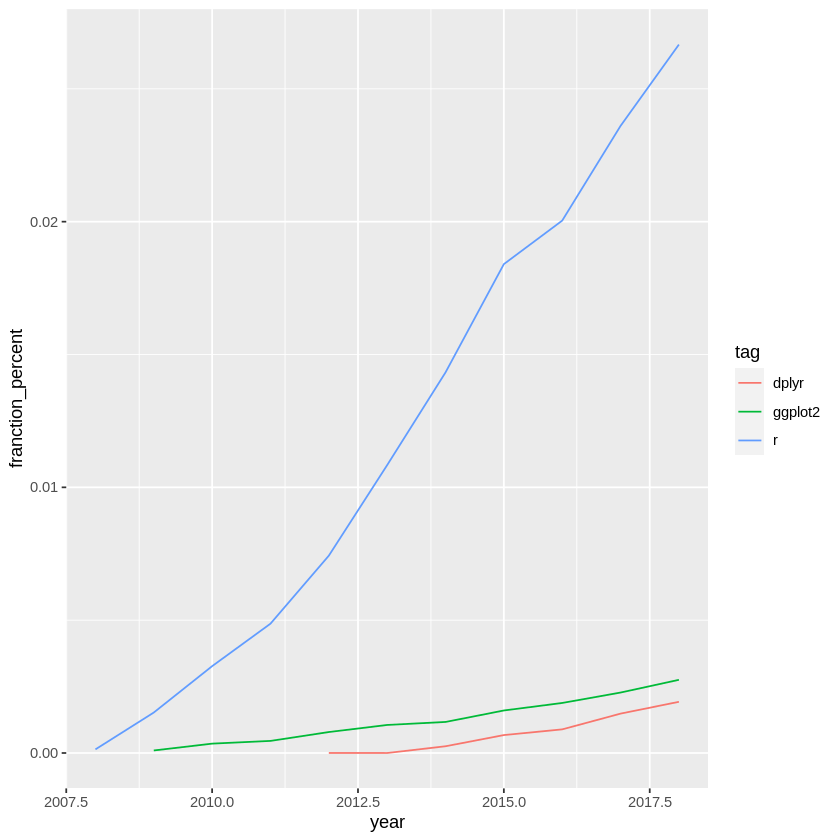

In [11]:
ggplot(selected_tags_over_time, aes(x = year,
                                    y = franction_percent,color=tag))+ geom_line()   

What are the most asked-about tags?

In [12]:
most_searched= pl %>%
    group_by(tag) %>%
    summarise(total_tag=sum(number)) %>%
    arrange(desc(total_tag))
  print(most_searched)

# A tibble: 4,080 × 2
   tag        total_tag
   <chr>          <int>
 1 javascript   1632049
 2 java         1425961
 3 c#           1217450
 4 php          1204291
 5 android      1110261
 6 python        970768
 7 jquery        915159
 8 html          755341
 9 c++           574263
10 ios           566075
# … with 4,070 more rows


In [13]:
popular_tags=c("javascript","java","c#","c#","android","python")

7. How have large programming languages changed over time?

,year,tag,number,year_total,franction_percent
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,2008,android,38,58390,0.0006507964
2,2008,c#,7473,58390,0.1279842439
3,2008,java,4315,58390,0.0738996403
4,2008,javascript,2736,58390,0.0468573386
5,2008,python,2080,58390,0.0356225381
6,2009,android,1991,343868,0.0057900124
7,2009,c#,46044,343868,0.1339002175
8,2009,java,24023,343868,0.0698611095
9,2009,javascript,18722,343868,0.0544453104


   year        tag number year_total franction_percent
1  2008    android     38      58390      0.0006507964
2  2008         c#   7473      58390      0.1279842439
3  2008       java   4315      58390      0.0738996403
4  2008 javascript   2736      58390      0.0468573386
5  2008     python   2080      58390      0.0356225381
6  2009    android   1991     343868      0.0057900124
7  2009         c#  46044     343868      0.1339002175
8  2009       java  24023     343868      0.0698611095
9  2009 javascript  18722     343868      0.0544453104
10 2009     python  12906     343868      0.0375318436
11 2010    android  27280     694391      0.0392862235
12 2010         c#  75501     694391      0.1087298078
13 2010       java  54519     694391      0.0785134024
14 2010 javascript  43407     694391      0.0625108908
15 2010     python  27098     694391      0.0390241233
16 2011    android  86987    1200551      0.0724558973
17 2011         c# 113408    1200551      0.0944632923
18 2011   

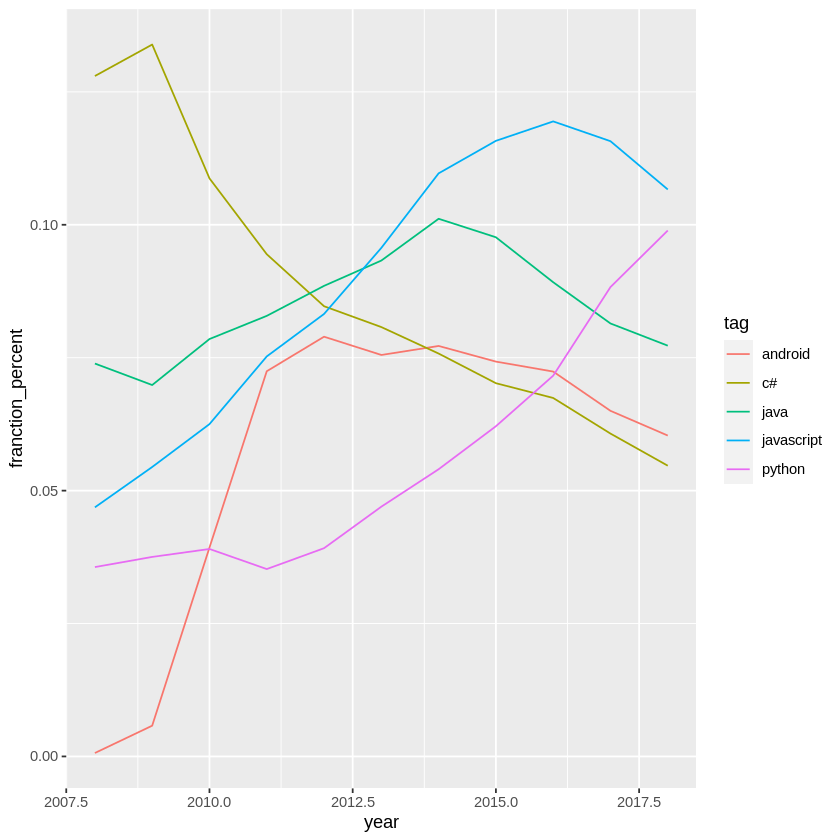

In [14]:
by_populat_tags= by_tag_year_fraction %>%
  filter(tag %in% popular_tags )
  format(by_populat_tags,scientific=FALSE)
  print(by_populat_tags)
  ggplot(by_populat_tags,aes(x=year,y=franction_percent,color=tag))+geom_line()
  

 let's check out how three big mobile operating systems (Android, iOS, and Windows Phone) have compared in popularity over time

In [15]:
os=c('android','ios','windows-phone')
by_os_tags=by_tag_year_fraction %>%
  filter(tag %in% os)
format(by_os_tags,scientific=FALSE)

,year,tag,number,year_total,franction_percent
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,2008,android,38,58390,0.00065079637
2,2008,ios,95,58390,0.00162699092
3,2008,windows-phone,1,58390,0.00001712622
4,2009,android,1991,343868,0.00579001245
5,2009,ios,615,343868,0.00178847697
6,2010,android,27280,694391,0.03928622347
7,2010,ios,3748,694391,0.00539753539
8,2010,windows-phone,47,694391,0.00006768521
9,2011,android,86987,1200551,0.07245589733


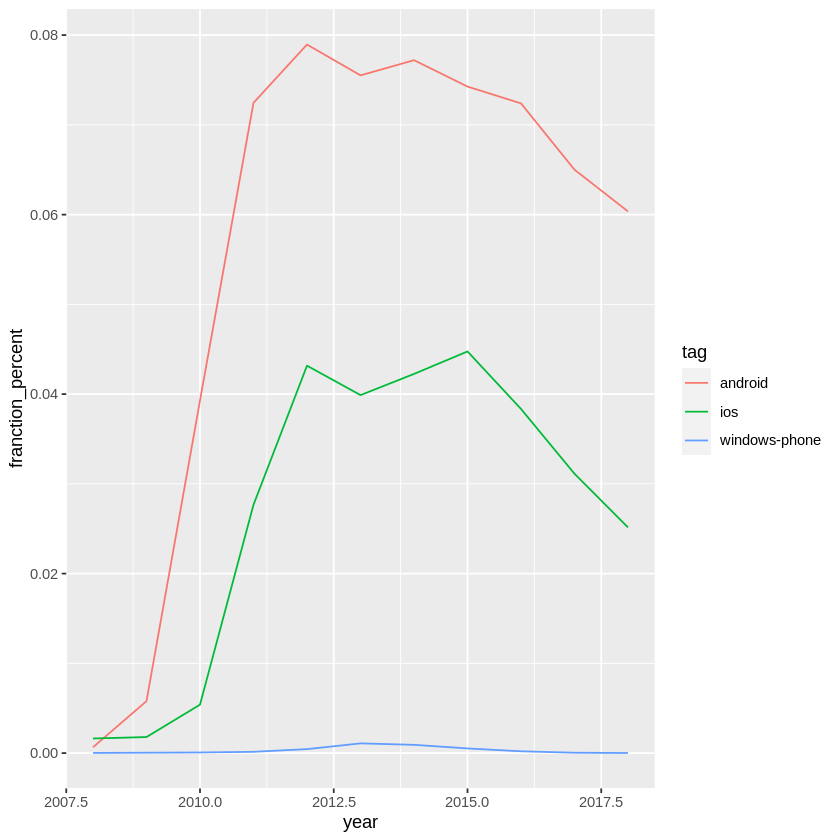

In [16]:
ggplot(by_os_tags,aes(x=year,y=franction_percent,color=tag))+geom_line()

Lets see which one is more popular programing language among programers between R and Python.



In [17]:
r_vs_python=c("r","python")

In [27]:
most_popular= pl %>%
filter( tag %in% r_vs_python) %>%
group_by(tag) %>%
summarise(total_searched=sum(number))
print(most_popular)


# A tibble: 2 × 2
  tag    total_searched
  <chr>           <int>
1 python         970768
2 r              243016


In [28]:
which_most_popular= by_tag_year_fraction %>%
filter(tag %in% r_vs_python)
format(which_most_popular,scientific = FALSE)

,year,tag,number,year_total,franction_percent
,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>,<I<chr>>
1,2008,python,2080,58390,0.0356225381
2,2008,r,8,58390,0.0001370098
3,2009,python,12906,343868,0.0375318436
4,2009,r,524,343868,0.0015238405
5,2010,python,27098,694391,0.0390241233
6,2010,r,2270,694391,0.0032690516
7,2011,python,42313,1200551,0.0352446502
8,2011,r,5845,1200551,0.0048685978
9,2012,python,64456,1645404,0.0391733580


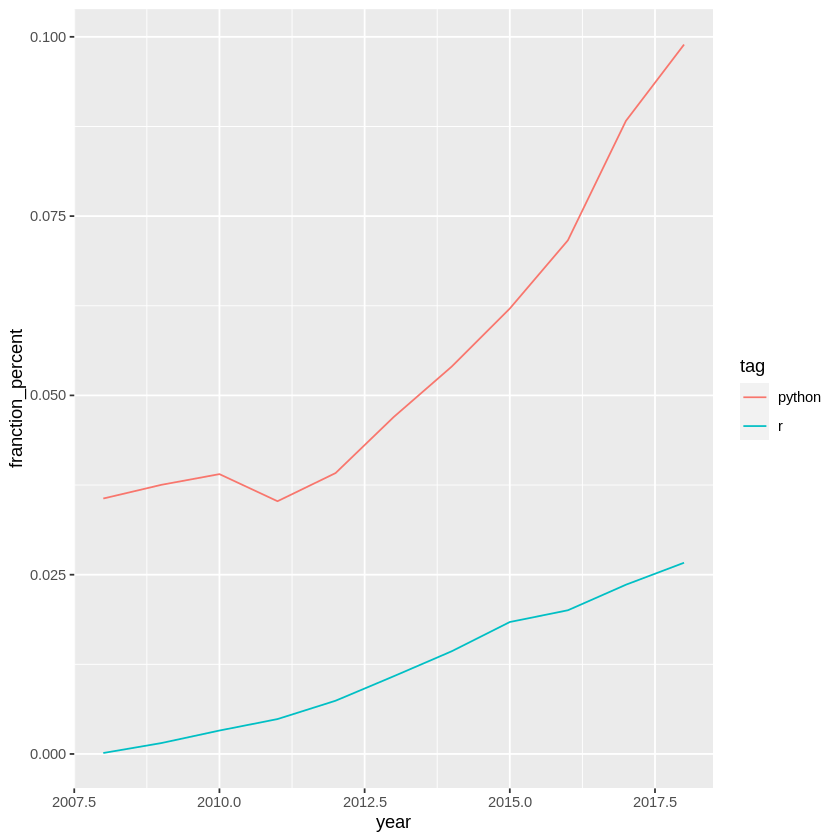

In [29]:
ggplot(which_most_popular,aes(x=year,y=franction_percent,color=tag))+geom_line()

From the above graph it is evident that, though popularity of R is growing rapidly still it is far behind from Python in terms of popularity.